In [1]:
from fastai.vision.all import *
import gradio as gr
from PIL import Image

In [2]:
def is_cat(x): return x[0].isupper()

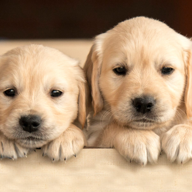

In [3]:
im = Image.open('img/dog.jpg')
im.thumbnail((192, 192))
im

In [4]:
learn = load_learner('model.pkl')

In [5]:
learn.dls.vocab

[False, True]

In [6]:
learn.predict('img/dog.jpg')

('False', TensorBase(0), TensorBase([0.9970, 0.0030]))

In [7]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [8]:
classify_image('img/dog.jpg')

{'Dog': 0.9969519376754761, 'Cat': 0.0030481002759188414}

In [9]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['img/dog.jpg', 'img/cat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=True)

/Users/ignaciomoyaredondo/opt/anaconda3/envs/fastai/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/ignaciomoyaredondo/opt/anaconda3/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/ignaciomoyaredondo/opt/anaconda3/envs/fastai/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/ignaciomoyaredondo/opt/anaconda3/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
